In [36]:
import pandas as pd

In [37]:
books_df = pd.read_csv("../data/raw/Books.csv", sep=";")
ratings_df = pd.read_csv("../data/raw/Ratings.csv", sep=";")
users_df = pd.read_csv("../data/raw/Users.csv", sep=";")

C:\Users\ŞEVKET\AppData\Local\Temp\ipykernel_11840\1924555899.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  users_df = pd.read_csv("../data/raw/Users.csv", sep=";")


In [38]:
datasets = {
    "Books": books_df,
    "Ratings": ratings_df,
    "Users": users_df
}

for name, df in datasets.items():
    print(f"\n {name} Dataset")
    print("-" * 10)
    print(f"Shape: {df.shape}")
    print(f"Columns: {list(df.columns)}")
    print("\nHead:")
    display(df.head())
    print("\nInfo:")
    print(df.info())
    print(f"\n{name} Missing Values")
    print(df.isnull().sum())
    print("=" * 0)



 Books Dataset
----------
Shape: (271379, 5)
Columns: ['ISBN', 'Title', 'Author', 'Year', 'Publisher']

Head:


,ISBN,Title,Author,Year,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271379 entries, 0 to 271378
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   ISBN       271379 non-null  object
 1   Title      271379 non-null  object
 2   Author     271377 non-null  object
 3   Year       271379 non-null  int64 
 4   Publisher  271377 non-null  object
dtypes: int64(1), object(4)
memory usage: 10.4+ MB
None

Books Missing Values
ISBN         0
Title        0
Author       2
Year         0
Publisher    2
dtype: int64


 Ratings Dataset
----------
Shape: (1149780, 3)
Columns: ['User-ID', 'ISBN', 'Rating']

Head:


,User-ID,ISBN,Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   User-ID  1149780 non-null  int64 
 1   ISBN     1149780 non-null  object
 2   Rating   1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB
None

Ratings Missing Values
User-ID    0
ISBN       0
Rating     0
dtype: int64


 Users Dataset
----------
Shape: (278859, 2)
Columns: ['User-ID', 'Age']

Head:


,User-ID,Age
0,1,NaN
1,2,18
2,3,NaN
3,4,17
4,5,NaN



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278859 entries, 0 to 278858
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   User-ID  278859 non-null  object
 1   Age      168627 non-null  object
dtypes: object(2)
memory usage: 4.3+ MB
None

Users Missing Values
User-ID         0
Age        110232
dtype: int64



In [39]:
duplicate_isbn_count = books_df['ISBN'].duplicated().sum()
print(f"Number of duplicate ISBNs: {duplicate_isbn_count}")


Number of duplicate ISBNs: 1


In [40]:
duplicate_isbns = books_df[books_df['ISBN'].duplicated(keep=False)]
print(f"Duplicate ISBN examples:\n")
display(duplicate_isbns.sort_values('ISBN').head(10))


Duplicate ISBN examples:



,ISBN,Title,Author,Year,Publisher
111658,0486404242,War in Kind: And Other Poems (Dover Thrift Edi...,Stephen Crane,1998,Dover Publications
111813,0486404242,War in Kind: And Other Poems (Dover Thrift Edi...,Stephen Crane,1998,Dover Publications


In [41]:
books_df = books_df.drop_duplicates(subset='ISBN', keep='first')

In [42]:
valid_isbns = set(books_df['ISBN'])
ratings_df = ratings_df[ratings_df['ISBN'].isin(valid_isbns)]

In [43]:
duplicate_isbn_count = books_df['ISBN'].duplicated().sum()
print(f"Number of duplicate ISBNs: {duplicate_isbn_count}")


Number of duplicate ISBNs: 0


In [44]:
null_years = books_df['Year'].isnull().sum()
print(f"Number of missing (NaN) Year values: {null_years}")

print(f"Min Year: {books_df['Year'].min()}")
print(f"Max Year: {books_df['Year'].max()}")

print("\nLowest 5 Years:")
display(books_df.sort_values('Year').head())

print("\nHighest 5 Years:")
display(books_df.sort_values('Year', ascending=False).head())

Number of missing (NaN) Year values: 0
Min Year: 0
Max Year: 2050

Lowest 5 Years:


,ISBN,Title,Author,Year,Publisher
136816,0771557000,Great Expectations,Charles Dickens,0,Gage Publishing Ltd
110434,0340425636,You Only Live Twice,Ian Fleming,0,Trafalgar Square
184966,2253031208,L' Eglise Verte (Le Livre De Poche),Herve Bazin,0,Livre de Poche
184970,227723981X,Maman a Un Amant,Beyala,0,Editions 84
184973,0330300059,Before She Met Me,Julian Barnes,0,Pan Books Ltd



Highest 5 Years:


,ISBN,Title,Author,Year,Publisher
80267,0140301690,Alice's Adventures in Wonderland and Through t...,Lewis Carroll,2050,Puffin Books
97830,0140201092,Outline of European Architecture (Pelican S.),Nikolaus Pevsner,2050,Penguin USA
116058,0394701658,Three Plays of Eugene Oneill,Eugene O'Neill,2038,Vintage Books USA
255426,068471809X,To Have and Have Not,Ernest Hemingway,2037,Simon & Schuster
78171,0870449842,Crossing America,National Geographic Society,2030,National Geographic


In [45]:
import datetime

In [46]:
#datasetin toplandığı tarih 2004
today_year = datetime.datetime.now().year
cutoff_year_strict = 2004
cutoff_year_soft = 2007

In [47]:
books_df_soft = books_df.copy()
books_df_strict = books_df.copy()

In [48]:
books_df_soft['Year'] = books_df_soft['Year'].replace(0, pd.NA)
books_df_strict['Year'] = books_df_strict['Year'].replace(0, pd.NA)

In [49]:
books_df_strict = books_df_strict[
    (books_df_strict['Year'].notna()) &
    (books_df_strict['Year'] <= cutoff_year_strict)
]

In [50]:
books_df_soft = books_df_soft[books_df_soft['Year'].notna() & (books_df_soft['Year'] <= cutoff_year_soft)]
books_df_soft['Suspect_Year'] = books_df_soft['Year'] > cutoff_year_strict

In [51]:
print(f"Strict cleaned books shape: {books_df_strict.shape}")
print(f"Soft cleaned books shape: {books_df_soft.shape}")

print(f"Number of suspect years in soft version: {books_df_soft['Suspect_Year'].sum()}")


Strict cleaned books shape: (266687, 5)
Soft cleaned books shape: (266736, 6)
Number of suspect years in soft version: 49


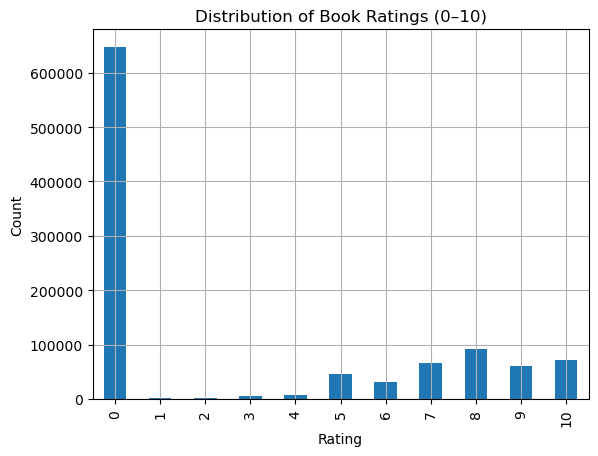

In [52]:
import matplotlib.pyplot as plt

ratings_df['Rating'].value_counts().sort_index().plot(kind='bar')
plt.title("Distribution of Book Ratings (0–10)")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.grid(True)
plt.show()


In [53]:
ratings_df_explicit = ratings_df[ratings_df['Rating'] > 0]


In [54]:
active_users = ratings_df['User-ID'].value_counts()
active_users = active_users[active_users >= 10].index
ratings_df = ratings_df[ratings_df['User-ID'].isin(active_users)]

In [55]:
popular_books = ratings_df['ISBN'].value_counts()
popular_books = popular_books[popular_books >= 10].index
ratings_df = ratings_df[ratings_df['ISBN'].isin(popular_books)]

In [56]:
books_df = books_df[books_df['ISBN'].isin(ratings_df['ISBN'])]
users_df = users_df[users_df['User-ID'].isin(ratings_df['User-ID'])]

In [57]:
users_df['Age'] = pd.to_numeric(users_df['Age'], errors='coerce')


C:\Users\ŞEVKET\AppData\Local\Temp\ipykernel_11840\60094083.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_df['Age'] = pd.to_numeric(users_df['Age'], errors='coerce')


In [58]:
users_df.loc[(users_df['Age'] < 5) | (users_df['Age'] > 100), 'Age'] = pd.NA

In [59]:
# users_df['Age'].fillna(users_df['Age'].median(), inplace=True)

books_df_strict shape: (266687, 5)
books_df_soft shape: (266736, 6)
books_df_soft suspect years: 49


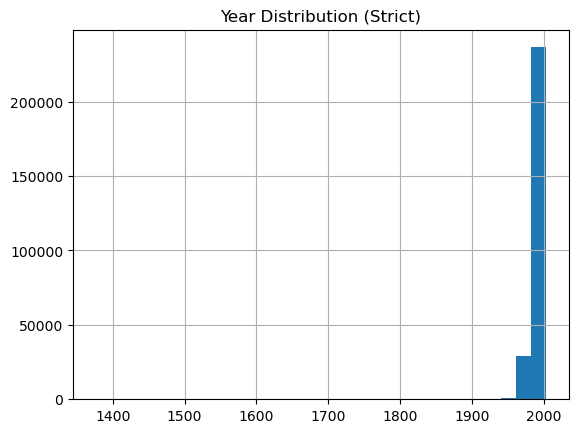

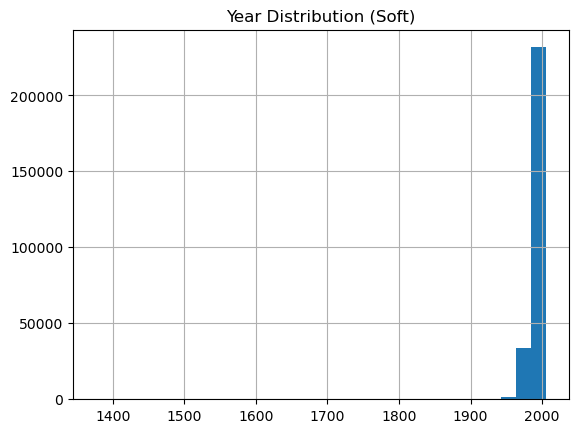

In [60]:
print(f"books_df_strict shape: {books_df_strict.shape}")
print(f"books_df_soft shape: {books_df_soft.shape}")
print(f"books_df_soft suspect years: {books_df_soft['Suspect_Year'].sum()}")

books_df_strict['Year'].hist(bins=30)
plt.title("Year Distribution (Strict)")
plt.show()

books_df_soft['Year'].hist(bins=30)
plt.title("Year Distribution (Soft)")
plt.show()


ratings_df shape: (405308, 3)
Rating value counts:
Rating
0     269604
1        419
2        754
3       1580
4       2337
5      13614
6      10465
7      22886
8      33293
9      23802
10     26554
Name: count, dtype: int64
Unique users: 11526
Unique books: 14617


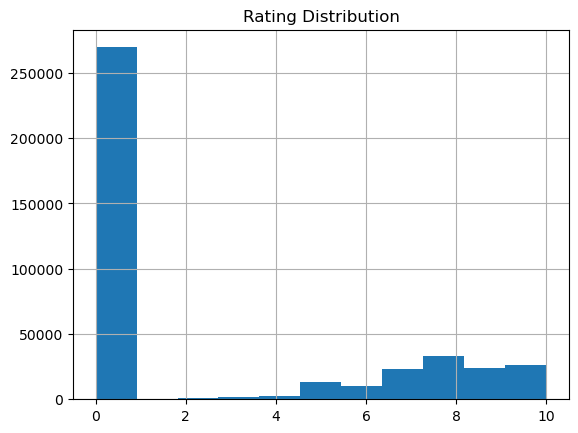

In [61]:
print(f"ratings_df shape: {ratings_df.shape}")
print("Rating value counts:")
print(ratings_df['Rating'].value_counts().sort_index())

print("Unique users:", ratings_df['User-ID'].nunique())
print("Unique books:", ratings_df['ISBN'].nunique())

ratings_df['Rating'].hist(bins=11)
plt.title("Rating Distribution")
plt.show()


users_df shape: (10838, 2)
Number of users with known Age: 7648


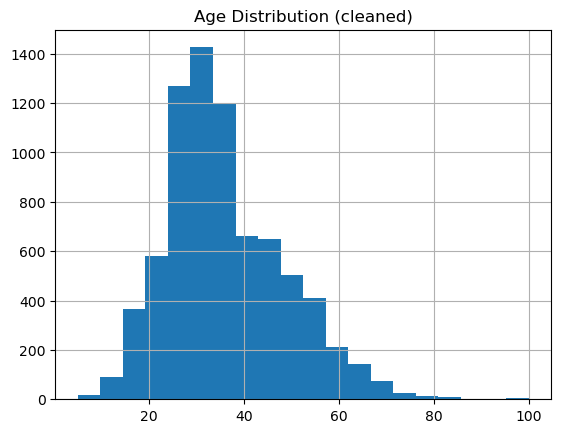

In [62]:
print(f"users_df shape: {users_df.shape}")
print(f"Number of users with known Age: {users_df['Age'].notna().sum()}")

users_df['Age'].hist(bins=20)
plt.title("Age Distribution (cleaned)")
plt.show()


In [63]:
print(f"ratings_df_explicit shape: {ratings_df_explicit.shape}")
print("Unique users:", ratings_df_explicit['User-ID'].nunique())
print("Unique books:", ratings_df_explicit['ISBN'].nunique())


ratings_df_explicit shape: (383852, 3)
Unique users: 68092
Unique books: 149842


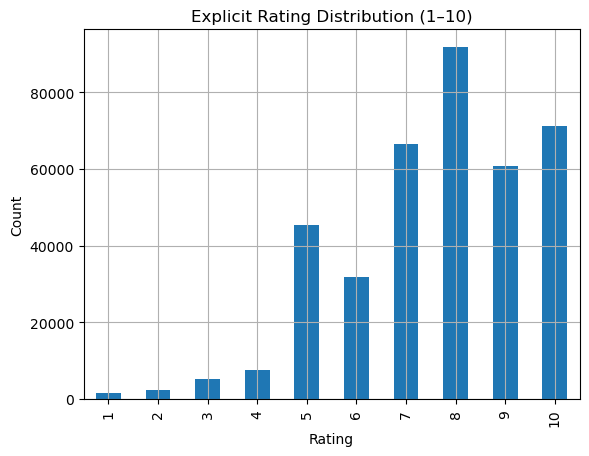

In [64]:
ratings_df_explicit['Rating'].value_counts().sort_index().plot(kind='bar')
plt.title("Explicit Rating Distribution (1–10)")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.grid(True)
plt.show()


In [65]:
user_rating_counts = ratings_df_explicit['User-ID'].value_counts()
print("Avg. ratings per user:", round(user_rating_counts.mean(), 2))
print("Users with 10+ ratings:", (user_rating_counts >= 10).sum())


Avg. ratings per user: 5.64
Users with 10+ ratings: 6589


In [66]:
book_rating_counts = ratings_df_explicit['ISBN'].value_counts()
print("Avg. ratings per book:", round(book_rating_counts.mean(), 2))
print("Books with 10+ ratings:", (book_rating_counts >= 10).sum())


Avg. ratings per book: 2.56
Books with 10+ ratings: 5444


In [67]:
n_users = ratings_df_explicit['User-ID'].nunique()
n_books = ratings_df_explicit['ISBN'].nunique()
n_ratings = ratings_df_explicit.shape[0]

density = n_ratings / (n_users * n_books)
print(f"Matrix density: {round(density * 100, 4)}%")

Matrix density: 0.0038%


In [ ]:
books_df.to_csv("../data/processed/books_final.csv", index=False)
books_df_strict.to_csv("../data/processed/books_clean_strict.csv", index=False)
books_df_soft.to_csv("../data/processed/books_clean_soft.csv", index=False)

ratings_df.to_csv("../data/processed/ratings_final.csv", index=False)
ratings_df_explicit.to_csv("../data/processed/ratings_explicit_only.csv", index=False)

users_df.to_csv("../data/processed/users_final.csv", index=False)

##  General Data Summary & Analysis – Book-Crossing Dataset

###  Rating Distribution (Explicit)
- Users predominantly give high ratings (7–10), with **8 being the most frequent** (~90k).
- Very few low ratings (1–3), indicating **positive bias**.
-  Suggests ranking metrics like `Precision@k`, `Recall@k`, `NDCG` instead of pure RMSE.

---

###  User & Book Activity
| Metric                    | Value     |
|---------------------------|-----------|
| Unique users              | 68,092    |
| Avg. ratings per user     | 5.64      |
| Users with ≥10 ratings    | 6,589     |
| Unique books              | 149,842   |
| Avg. ratings per book     | 2.56      |
| Books with ≥10 ratings    | 5,444     |

 Takeaway:
- Majority of users and books are inactive
- Risk of **cold-start** is high
- Filtering by activity/popularity is essential

---

###  Matrix Sparsity
- Total interactions: 383,852
- Matrix shape: 68k × 149k → 10.1 billion potential cells
- Actual filled cells: **0.0038%**
-  **Extremely sparse dataset**

 Implication:
- Matrix Factorization (SVD, ALS) may underperform
- Use:
  - Content-based hybrids
  - Popularity-based fallbacks
  - Advanced sampling techniques for deep models

---

###  Strategy Summary
| Goal                          | Recommendation                    |
|-------------------------------|------------------------------------|
| Baseline model                | Top-N popularity by count or mean |
| Explicit collaborative model  | SVD / NMF                         |
| Implicit feedback model       | ALS / LightFM                     |
| Cold-start solution           | Content-based filtering + fallback|
| Evaluation metrics            | Ranking-based: NDCG, MAP, P@k     |

---

###  Notebook Conclusion
- Dataset cleaned and filtered
- Exported as CSV to `data/processed/`
- Ready for modeling in `01_modeling_collab.ipynb` and beyond